#**01 개요**  
**트리(Tree)**는 하나의 뿌리에서 위로 뻗어 나가는 형상처럼 생겨서 '트리(나무)' 라는 명칭이 붙었는데  
트리 구조를 표현할 때는 나무의 형상과는 반대 방향으로 표현한다  

- 예) 한 가족의 족보나 회사의 조직도 등

또한 트리의 중요한 속성 중 하나는 **재귀로 정의된 자기참조 자료구조**라는 점  
쉽게 말하면 트리는 자식도 트리이고 또 그 자식도 트리다  
즉 여러 개의 트리가 쌓아 올려져 큰 트리가 된다.  
흔히 서브트리로 구성된다고 표현한다

## **트리의 각 명칭**
트리는 항상 **루트(Root)**에서부터 시작된다  
루트는 **자식(Child)**노드를 가지며, **간선(Edge)**으로 연결되어 있다  
자식 노드의 개수는 **차수(Degree)**라고 하며, **크기(Size)**는 자신을 포함한 모든 자식 노드의 개수이다  
**높이(Height)**는 현재 위치에서부터 리프(Leaf) 까지의 거리  
**깊이(Depth)**는 루트에서부터 현재 노드까지의 거리이다  
트리는 그 자식도 트리인 **서브트리(Subtree)구성**을 띈다

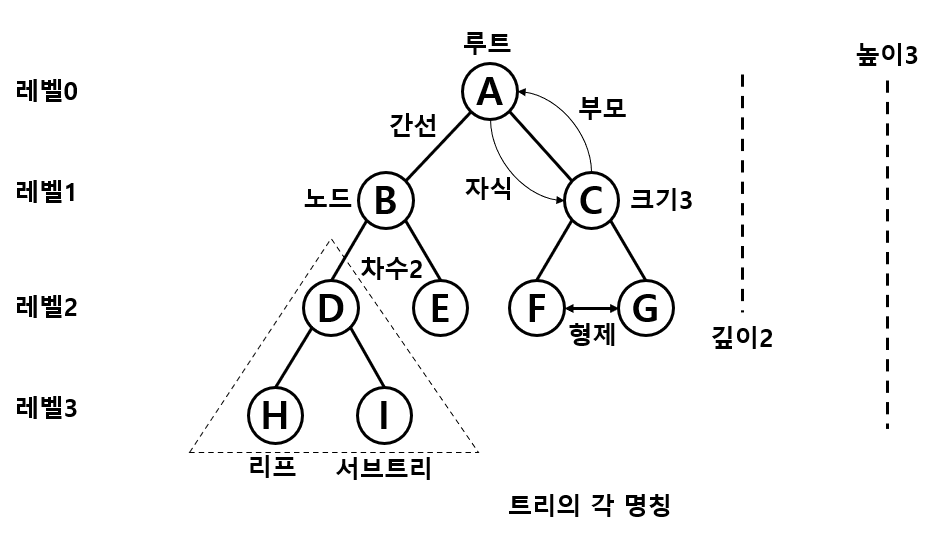

레벨은 0에서부터 시작한다  
트리는 항상 단방향이기 때문에, 간선의 화살표는 생략 가능하다

## **그래프 VS 트리**
그래프와 트리의 가장 큰 차이점 : **트리는 순환 구조를 갖지 않는 그래프이다**  
핵심은 순환 구조가 아니라는 데 있다  
- 트리는 그래프와 달리 어떠한 경우에도 한번 연결된 노드가 다시 연결되는 법이 없다  
- 단방향, 양방향을 모두 가르킬 수 있는 그래프와 달리, 트리는 부모 노드에서 자식 노드를 가르키는  
단방향 뿐이다  
- 트리는 하나의 부모 노드를 갖는다는 차이점이 있고 루트 또한 하나여야 한다  


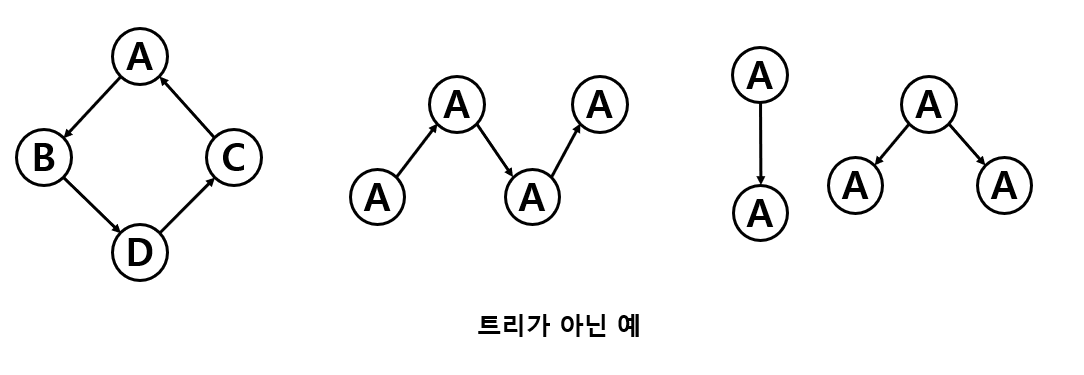

## **이진 트리**
트리 중에서도 가장 널리 사용되는 트리 자료구조는 이진 트리와 이진 탐색 트리다  
각 노드가 m개 이하의 자식을 갖추고 있으면, **m-ary 트리**(다항 트리, 다진 트리) 라고 한다  
여기서 m = 2 일 경우, 모든 노드의 차수가 2 이하일 때, 특별히 **이진 트리**라고 구분해서 부른다  


**이진 트리 유형**
- 정 이진 트리(Full Binary Tree) : 모든 노드가 0개 또는 2개의 자식 노드를 갖는다  
- 완전 이진 트리(Complete Binary Tree) : 마지막 레벨을 제외하고 모든 레벨이 완전히 채워져 있으며  
마지막레벨의 모든 노드는 가장 왼쪽부터 채워져 있다  
- 포화 이진 트리(Perfect Binary Tree) : 모든 노드가 2개의 자식 노드를 갖고 있으며, 모든 리프 노드가 동일한 깊이 또는 레벨을 갖는다.  
문자 그대로 가장 환벽한 유형의 트리다 


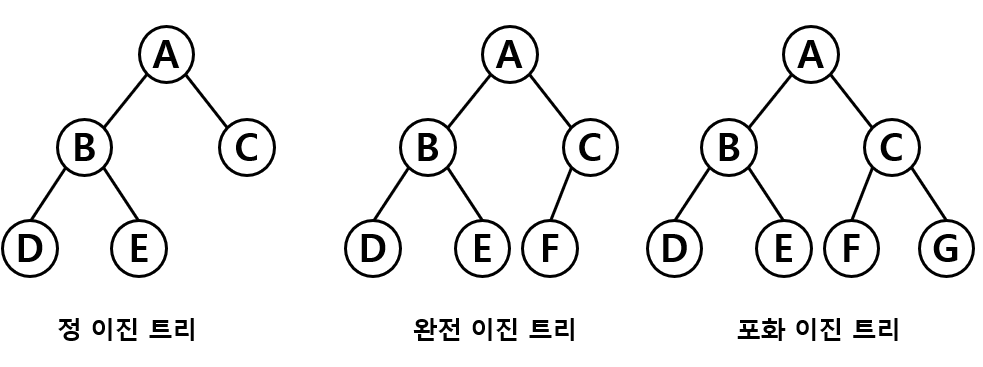

# **02 예제 풀이**

## **Q42 | 이진 트리의 최대 깊이**

이진 트리의 최대 깊이를 구하라  
- [3,9,20,null,null,15,7]가 주어졌을 때, 깊이는 3이다

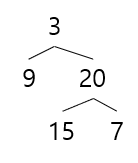

### **풀이 01 // 반복구조로 BFS 풀이**

**BFS** : 너비 우선 탐색  
(DFS는 스택, BFS는 큐를 사용한다)

In [80]:
import collections


# 트리 노드 정의
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        if root is None:
            return 0
        queue = collections.deque([root])
        depth = 0

        while queue:
            depth += 1
            # 큐 연산 추출 노드의 자식 노드 삽입
            for _ in range(len(queue)): 
                cur_root = queue.popleft() 
                if cur_root.left: 
                    queue.append(cur_root.left) 
                if cur_root.right:
                    queue.append(cur_root.right)
        # BFS 반복 횟수 == 깊이
        return depth

s = Solution()
root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(7)
print(s.maxDepth(root))

3


```
queue = collections.deque([root])
```
위의 코드를 지나면 queue 변수는 아래의 상태이다 
```
deque([TreeNode{val: 3, left: TreeNode{val: 9, left: None, right: None}, right: TreeNode{val: 20, left: TreeNode{val: 15, left: None, right: None}, right: TreeNode{val: 7, left: None, right: None}}}])
```
3의 왼쪽에 9 오른쪽에 20,  20의 왼쪽에 15, 오른쪽에 7이 들어있다  

```
while queue:
            depth += 1
```
queue가 한번 반복하면 depth에 +1 을 해준다  
depth는 0이였으므로 +1 이 되어 depth = 1 이 된 상태이다 

```
# 큐 연산 추출 노드의 자식 노드 삽입
            for _ in range(len(queue)): 
```
queue의 길이만큼 반복해준다.

```
cur_root = queue.popleft()
```
queue에서 왼쪽부터 하나씩 끄집어낸다 

```
if cur_root.left: 
  queue.append(cur_root.left) 
if cur_root.right:
  queue.append(cur_root.right)
```
끄집어낸 값에서 왼쪽값, 오른쪽값이 있는지 판별한다  
있다면 queue에 더해준다  


## Q43 | 이진 트리의 직경
이진 트리에서 두 노드 간 가장 긴 경로의 길이를 출력하라

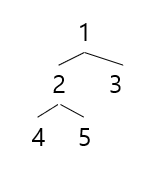



이진 트리가 위와 같을 때 가장 긴 경로는   
4 > 2 > 1 > 3 또는 5 > 2 > 1 > 3 이다

### 풀이 01 // 상태값 누적 트리 DFS

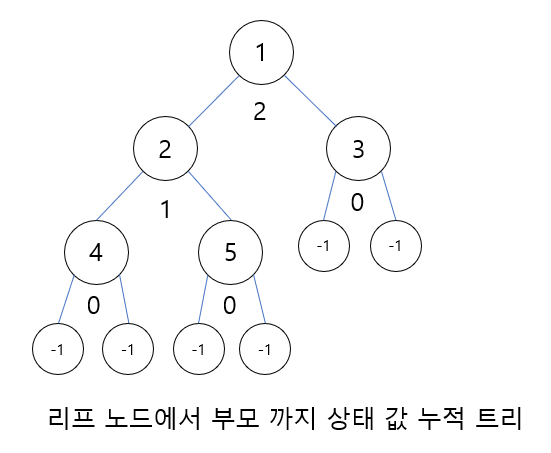

존재하지 않는 노드에도 -1 이라는 값을 부여하는데 이는 이진 트리가 아닌 대부분의 경우  
존재하지 않는 자식 노드에 -1 을 부여해 패널티를 주기 위함이다  

이렇게 거슬러 올라가 최종 루트에서 상태값은 2, 거리는 3이 된다

In [81]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    longest: int = 0

    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        def dfs(node: TreeNode) -> int:
            if not node:
                return -1
            # 왼쪽, 오른쪽 각각 리프 노드까지 탐색
            left = dfs(node.left)
            right = dfs(node.right)

            # 가장 긴 경로
            self.longest = max(self.longest, left + right + 2)
            # 상태값
            return max(left, right) + 1

        dfs(root)
        return self.longest

s = Solution()
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
print(s.diameterOfBinaryTree(root))

3


```
        def dfs(node: TreeNode) -> int:
            if not node:
                return -1
            # 왼쪽, 오른쪽 각각 리프 노드까지 탐색
            left = dfs(node.left)
            right = dfs(node.right)
```
재귀 호출을 통해 왼쪽, 오른쪽의 각 리프 노드까지 DFS로 탐색한다  
```
# 가장 긴 경로
            self.longest = max(self.longest, left + right + 2)
            # 상태값
            return max(left, right) + 1
```
그 후 2개의 값을 계산한다  
하나는 최종 결과가 될 가장 긴 경로 self.longest, 하나는 상태값 max(left,right) + 1 이다  
```
a = left + right + 2      # 거리
b = max(left+right) + 1   # 상태값
```
자식 노드가 하나도 없는 경우 거리는 0, 상태값도 0이 된다  
자식 노드가 존재하는 경우, 그리고 자식 노드가 둘 다 상태값이 0이라면  
거리인 a는 2, 상태값인 b는 1이 된다  
즉, 상태값은 양쪽 자식 중 최대 상태값과 부모까지의 거리인 1을 더하게 된다  

## Q44 | 가장 긴 동일 값의 경로
동일한 값을 지닌 가장 긴 경로를 찾아라  

**예제 1**
- 입력



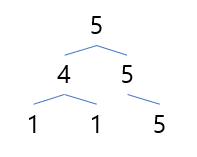

- 출력
```
2
```
- 설명
루트에서 오른쪽 노드 끝까지 5 > 5 > 5로 가장 긴 이동 거리가 2 이다

- 입력


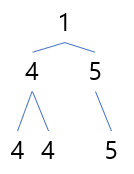

- 출력
```
2
```
- 설명
왼쪽 리프 노드 4에서 형제 노드 4까지 4 > 4 > 4로 가장 긴 이동 거리가 2 이다

### 풀이 01 // 상태값 거리 계산 DFS

In [82]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    result: int = 0

    def longestUnivaluePath(self, root: TreeNode) -> int:
        def dfs(node: TreeNode):
            if node is None:
                return 0

            # 존재하지 않는 노드까지 DFS 재귀 탐색
            left = dfs(node.left)
            right = dfs(node.right)

            # 현재 노드가 자식 노드와 동일한 경우 거리 1 증가
            if node.left and node.left.val == node.val:
                left += 1
            else:
                left = 0
            if node.right and node.right.val == node.val:
                right += 1
            else:
                right = 0

            # 왼쪽, 오른쪽 자식 노드간 거리의 합 최대값이 결과
            self.result = max(self.result, left + right)
            # 자식 노드 상태값 중 큰 값 리턴
            return max(left, right)

        dfs(root)
        return self.result

s = Solution()
root = TreeNode(5)
root.left = TreeNode(4)
root.right = TreeNode(5)
root.left.left = TreeNode(1)
root.left.right = TreeNode(1)
root.right.right = TreeNode(5)
print(s.longestUnivaluePath(root))

root = TreeNode(1)
root.left = TreeNode(4)
root.right = TreeNode(5)
root.left.left = TreeNode(4)
root.left.right = TreeNode(4)
root.right.right = TreeNode(5)
print(s.longestUnivaluePath(root))

2
2


리프 노드까지 DFS로 탐색해 내려간 다음, 값이 일치할 경우 거리를 더해주는 방식으로 풀이가 가능하다  

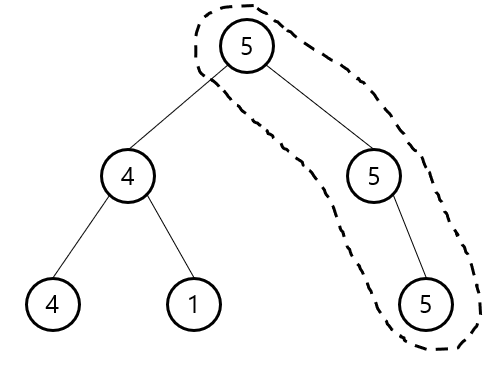

```
# 존재하지 않는 노드까지 DFS 재귀 탐색
            left = dfs(node.left)
            right = dfs(node.right)
```
각각의 left, right의 리프 노드까지 이르면 값을 리턴받는다

```
if node is None:
  return 0

```
존재하지 않는 노드까지 가면 0을 리턴한다

```
if node.left and node.left.val == node.val:
    left += 1
else:
    left = 0
if node.right and node.right.val == node.val:
    right += 1
else:
    right = 0
```
left와 right의 자식 노드를 각각 확인한 후, 부모 노드와 동일한 경우 각각 거리를 1 증가한다

```
self.result = max(self.result, left + right)
```
합이 가장 큰 값을 최종 결과로 한다

```
return max(left, right)
```
단방향이므로 양쪽 자식 노드 중 큰 값만을 상태값으로 리턴해준다
